In [1]:
from back_algorithm_update import *
import numpy as np

In [2]:
# radius and lum_sim are the parameters to control the privacy level
radius = 6
lum_sim = 75

image = cv2.imread('./visualization examples/line.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print("before resize: ", image.shape)
if np.max(image)<=1:
    image = (image*255).astype(np.uint8)

tgt_img = rgb2gray(image)
img_blur = tgt_img


# separate the visual elements from the visualization background
thresh = filters.threshold_local(img_blur)
fg = img_blur < thresh


# obtain the background color
bg_area, fg_area = segment_bg(image)
bg_avg_lab = np.mean(rgb2lab(image[bg_area]),axis=0)
bg_avg_rgb= np.mean(image[bg_area],axis=0)


# obtain the line elements from the separated visual elements
fg_pad = np.pad(fg, radius)
contours, _ = get_contours(fg_pad)
ori_contour = draw_contour(fg_pad, contours)

# transform the line-based elements to the privacy-preserving version
if radius == 0:
    tgt_contour = proc_contour(ori_contour, contours, radius)
else:
    tgt_contour = proc_contour(ori_contour, contours, radius)[radius:-radius, radius:-radius]
output = get_privacy_result(image, tgt_contour, fg, bg_avg_rgb, lum_sim)
output = (lab2rgb(output)*255.0).astype(np.uint8)


# transform the text elements to the privacy-preserving version
bboxes = None
output, _ = run_ocr_in_chart(image, output, bg_avg_lab, bboxes)


before resize:  (1156, 1113, 3)


/home/songheng/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


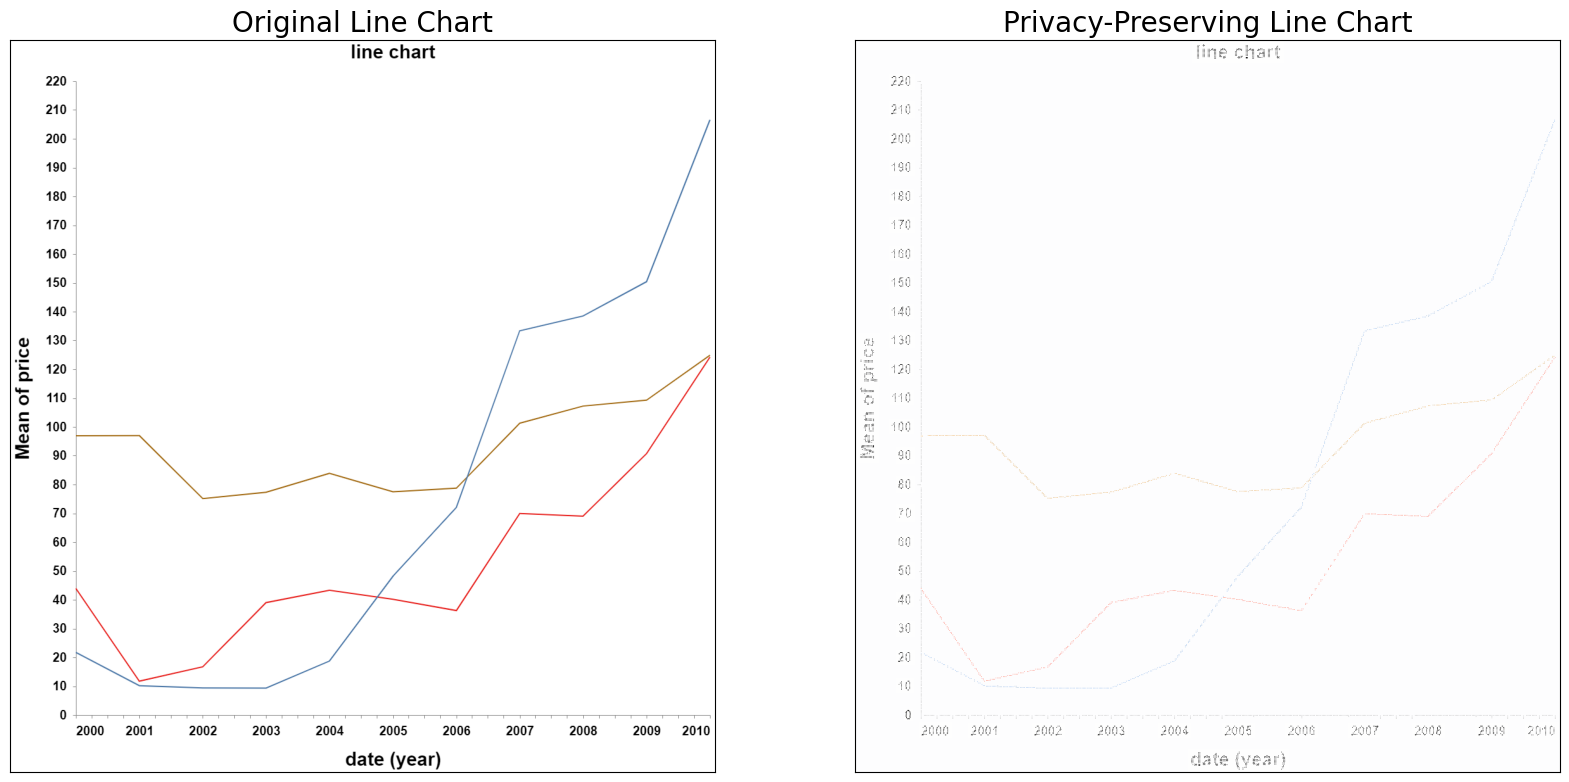

In [3]:

f, axs = plt.subplots(1, 2, figsize=(20, 10))
# plt.figure(figsize=(10,10))
axs[0].set_title("Original Line Chart", fontsize=20)
axs[0].imshow(image)
axs[0].get_xaxis().set_ticks([])
axs[0].get_yaxis().set_ticks([])

axs[1].set_title("Privacy-Preserving Line Chart", fontsize=20)
axs[1].imshow(output)
axs[1].get_xaxis().set_ticks([])
axs[1].get_yaxis().set_ticks([])
plt.show()